# XGBoost classifier of 5 main states of anesthesia

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

import numpy as np

In [2]:
D_data = np.load('box_plot_data/D.npy', allow_pickle=True).item()

# convert data for box plots visualization
prop_delta = [D_data['D_prop_delta'][i] for i in range(22)]
prop_alpha = [D_data['D_prop_delta'][i] for i in range(22)]
prop_beta  = [D_data['D_prop_beta'][i] for i in range(22)]
prop_gamma = [D_data['D_prop_gamma'][i] for i in range(22)]

alpha_delta = [D_data['D_alpha_delta'][i] for i in range(22)]
beta_delta = [D_data['D_beta_delta'][i] for i in range(22)]
gamma_delta = [D_data['D_gamma_delta'][i] for i in range(22)]
beta_alpha = [D_data['D_beta_alpha'][i] for i in range(22)]
gamma_alpha = [D_data['D_gamma_alpha'][i] for i in range(22)]
gamma_beta = [D_data['D_gamma_alpha'][i] for i in range(22)]
hf_lf = [D_data['D_hf_lf'][i] for i in range(22)]

f_50_q = [D_data['D_50_q'][i] for i in range(22)]
f_75_q = [D_data['D_75_q'][i] for i in range(22)]
f_85_q = [D_data['D_85_q'][i] for i in range(22)]
f_95_q = [D_data['D_95_q'][i] for i in range(22)]

supp = [D_data['D_supp'][i] for i in range(22)]

line_length = [D_data['D_line_length'][i] for i in range(22)]

entropy = [D_data['D_entropy'][i] for i in range(22)]
be = [D_data['D_be'][i] for i in range(22)]

f_central  = [D_data['D_f_central'][i] for i in range(22)]

In [3]:
def format_data(D, states_range = None):

    keys = list(D.keys()) # convert to list to assess the ken of len(D[keys[0]][i]), otherwise error with keys[0]
    X = []
    y = []
    if states_range == None:
        for i in range(21):
            N_samples_for_current_state = len(D[keys[0]][i])
            print(f'Number of samples in state {i}: {N_samples_for_current_state}')
            for j in range(N_samples_for_current_state):
                L = [] # line vector that will contain all features for this sample positionned at the jth element of state i
                if i < 4:
                    y.append(0)
                elif i < 7:
                    y.append(1)
                elif i < 13:
                    y.append(2)
                elif i < 17:
                    y.append(3)
                elif i < 21:
                    y.append(4)

                for key in keys:
                    L.append(D[key][i][j])
                X.append(L)
    
    elif type(states_range[0]) == int:
        for i in range(states_range[0], states_range[1]): # first state should be lower than second
            N_samples_for_current_state = len(D[keys[0]][i])
            print(f'Number of samples in state {i}: {N_samples_for_current_state}')
            for j in range(N_samples_for_current_state):
                L = [] # line vector that will contain all features for this sample positionned at the jth element of state i
                y.append(i - states_range[0])
                for key in keys:
                    L.append(D[key][i][j])
                X.append(L)        
    
    return np.array(X), np.array(y)

In [4]:
X, y = format_data(D_data)
print(f'X shape is: {np.shape(X)}')
print(f'y shape is: {np.shape(y)}')

Number of samples in state 0: 77
Number of samples in state 1: 73
Number of samples in state 2: 65
Number of samples in state 3: 237
Number of samples in state 4: 236
Number of samples in state 5: 550
Number of samples in state 6: 759
Number of samples in state 7: 1475
Number of samples in state 8: 1820
Number of samples in state 9: 5912
Number of samples in state 10: 8929
Number of samples in state 11: 5088
Number of samples in state 12: 1080
Number of samples in state 13: 773
Number of samples in state 14: 402
Number of samples in state 15: 314
Number of samples in state 16: 231
Number of samples in state 17: 127
Number of samples in state 18: 204
Number of samples in state 19: 218
Number of samples in state 20: 820
X shape is: (29390, 20)
y shape is: (29390,)


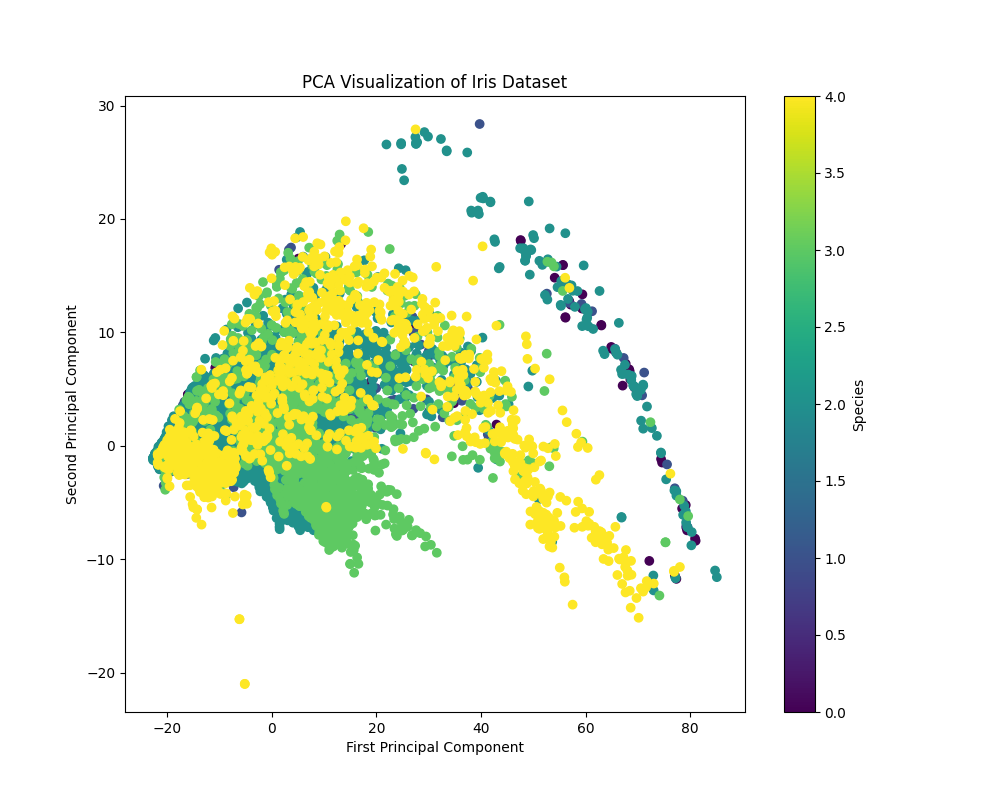

Explained variance ratio: [0.81160103 0.07900485]


In [5]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Species')
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [ ]:
import seaborn as sns
# Compute correlation matrix
corr_matrix = X[:, :-1].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()